In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
folder = 'C:/Users/arnau/Desktop/Master Thesis Files [TO BACKUP]/Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329'

# GPU solvings

In [7]:
df = pd.read_csv(folder + '/single_run_stats_2.csv', index_col=0)

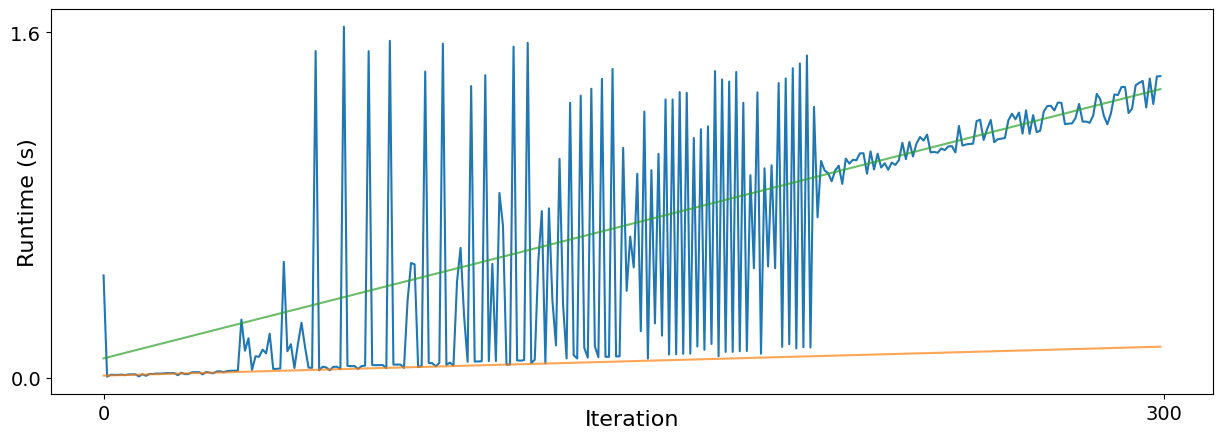

In [31]:
plt.figure(figsize=(15,5))

x = np.arange(300)

plt.plot(x, df.backup_times[1:], label='Backup function time')

trend_1 = np.polyfit(x[2:30],df.backup_times[2:30],1)
plt.plot(x, (x*trend_1[0])+trend_1[1], alpha=0.7, label=f'Trend 1 ({trend_1[0]:.5f} x + {trend_1[1]:.3f})')

trend_2 = np.polyfit(x[210:270],df.backup_times[210:270],1)
plt.plot(x, (x*trend_2[0])+trend_2[1], alpha=0.7, label=f'Trend 2 ({trend_2[0]:.5f} x + {trend_2[1]:.3f})')

# plt.legend()
plt.xticks([0, 300])
plt.xlabel('Iteration', labelpad=-10, fontdict={'size':16})

plt.yticks([0, 1.6])
plt.ylabel('Runtime (s)', labelpad=-20, fontdict={'size':16})

ax = plt.gca()
ax.tick_params(labelsize=14)

Text(0, 0.5, 'Runtime (s)')

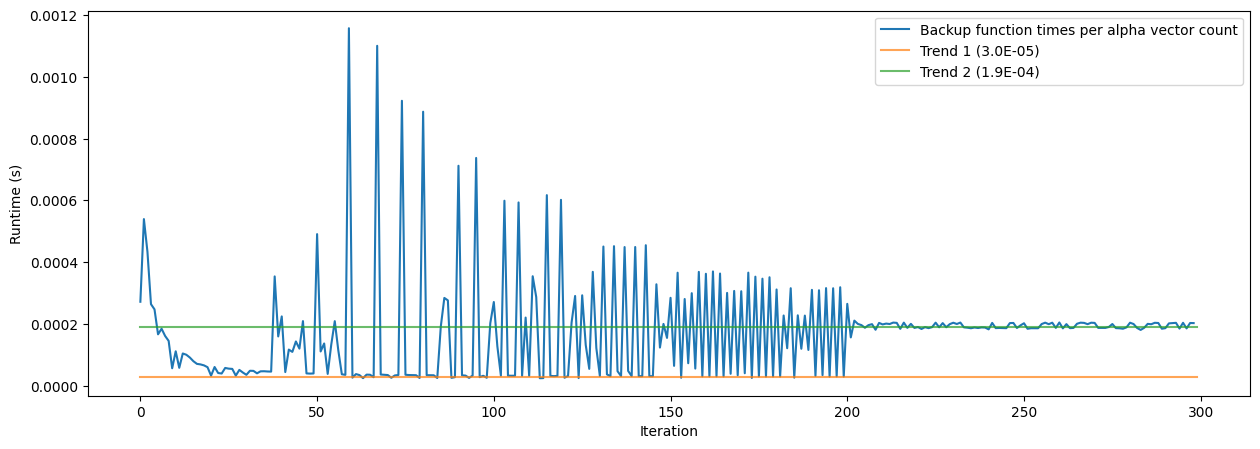

In [21]:
plt.figure(figsize=(15,5))

plt.plot(np.arange(299), np.array(df.backup_times)[2:] / np.array(df.alpha_vector_counts[2:]), label='Backup function times per alpha vector count')

trend_1 = np.polyfit(x[20:30], np.array(df.backup_times[20:30]) / np.array(df.alpha_vector_counts[21:31]), 1)
trend_1[1] = 30e-6
plt.plot(x, np.ones(len(x)) * trend_1[1], alpha=0.7, label=f'Trend 1 ({trend_1[1]:.1E})')

trend_2 = np.polyfit(x[210:270], np.array(df.backup_times[210:270]) / np.array(df.alpha_vector_counts[211:271]), 1)
plt.plot(x, np.ones(len(x)) * trend_2[1], alpha=0.7, label=f'Trend 2 ({trend_2[1]:.1E})')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Runtime (s)')

# CPU solvings

In [22]:
cpu_folder = folder + '/single_run_CPU_stats.csv'

In [23]:
cpu_hist_df = pd.read_csv(cpu_folder, index_col=0)

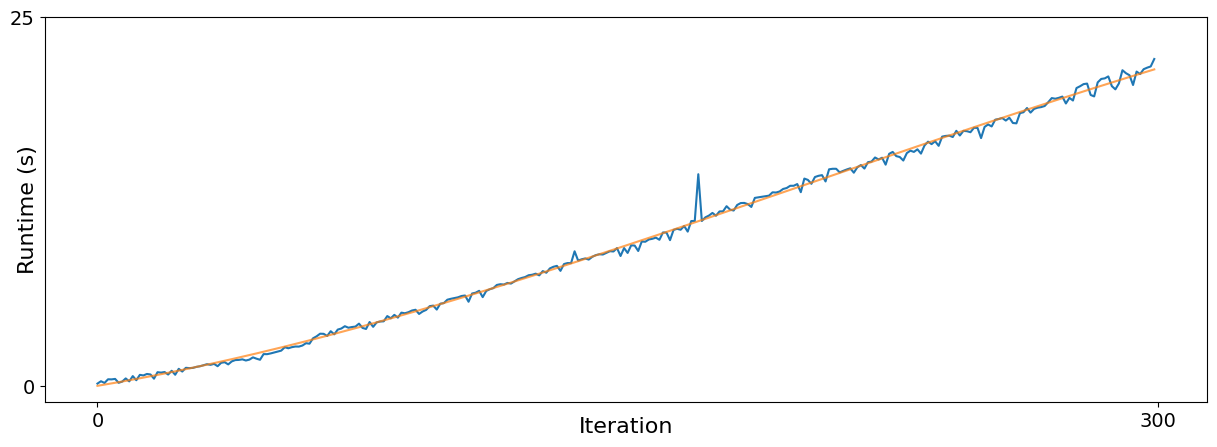

In [32]:
cpu_backup_times = cpu_hist_df['backup_times'].to_list()[1:]

plt.figure(figsize=(15,5))

x = np.arange(300)

plt.plot(x, cpu_backup_times, label='Backup function time')

trend_1 = np.polyfit(x[:300], cpu_backup_times[:300], 3)
plt.plot(x, ((x**3)*trend_1[0]) + ((x**2)*trend_1[1]) + (x*trend_1[2]) + trend_1[3], alpha=0.7, 
         label=f'Trend (${trend_1[0]:.2e} x^3 + {trend_1[1]:.5f} x^2 + {trend_1[2]:.5f} x + {trend_1[3]:.3f}$)')

# plt.legend()

plt.xticks([0, 300])
plt.xlabel('Iteration', labelpad=-10, fontdict={'size':16})

plt.yticks([0, 25])
plt.ylabel('Runtime (s)', labelpad=-20, fontdict={'size':16})

ax = plt.gca()
ax.tick_params(labelsize=14)

Text(0, 0.5, 'Runtime (s)')

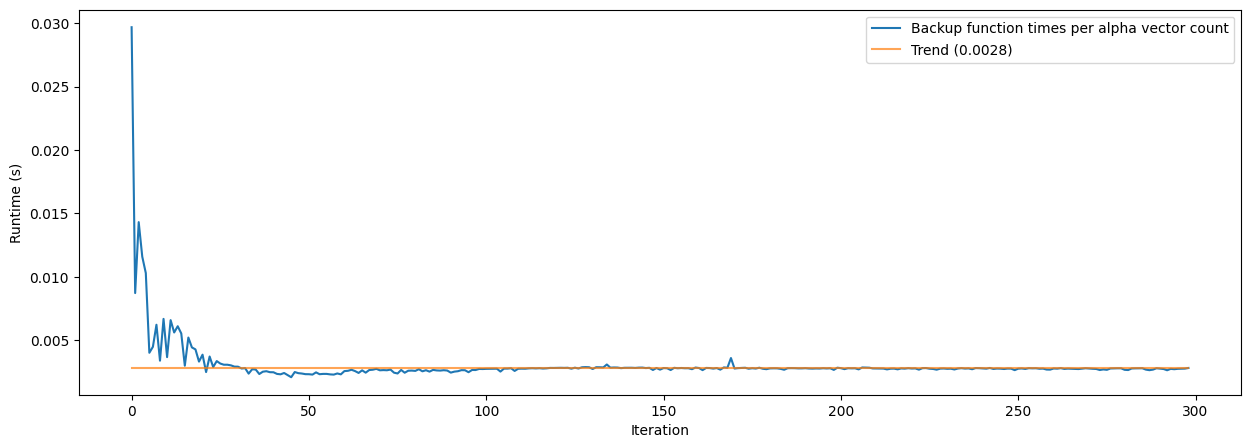

In [25]:
cpu_alpha_vector_counts = cpu_hist_df['alpha_vector_counts'].to_list()

plt.figure(figsize=(15,5))

x = np.arange(299)

plt.plot(x, np.array(cpu_backup_times)[1:] / np.array(cpu_alpha_vector_counts[1:-1]), label='Backup function times per alpha vector count')

trend_1 = np.polyfit(x[100:290], (np.array(cpu_backup_times)[1:] / np.array(cpu_alpha_vector_counts[1:-1]))[100:290], 1)
plt.plot(x, np.ones(len(x)) * trend_1[1], alpha=0.7, label=f'Trend ({trend_1[1]:.4f})')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Runtime (s)')

# Simulations